In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
print("Original DataFrame:")
print(df.head())

Original DataFrame:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
null_count = df.isnull().sum().sum()
print(null_count)


null_counts_per_column = df.isnull().sum()
print(null_counts_per_column)

869
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/var/folders/6y/wkyxtwb91ms1vgj1flry6l0hvvkbvq/T/ipykernel_92390/3727767796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/6y/wkyxtwb91ms1vgj1flry6l0hvvkbvq/T/ipykernel_92390/3727767796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [6]:
null_counts_per_column = df.isnull().sum()
print(null_counts_per_column)

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
df.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'embarked'], inplace=True)

In [9]:
print(df.head(10))

   survived  pclass     sex   age  sibsp  parch     fare   class  alone
0         0       3    male  22.0      1      0   7.2500   Third  False
1         1       1  female  38.0      1      0  71.2833   First  False
2         1       3  female  26.0      0      0   7.9250   Third   True
3         1       1  female  35.0      1      0  53.1000   First  False
4         0       3    male  35.0      0      0   8.0500   Third   True
5         0       3    male  28.0      0      0   8.4583   Third   True
6         0       1    male  54.0      0      0  51.8625   First   True
7         0       3    male   2.0      3      1  21.0750   Third  False
8         1       3  female  27.0      0      2  11.1333   Third  False
9         1       2  female  14.0      1      0  30.0708  Second  False


In [10]:
df = pd.get_dummies(df, columns=['sex', 'class'], drop_first=True)

In [11]:
print(df.head(10))

   survived  pclass   age  sibsp  parch     fare  alone  sex_male  \
0         0       3  22.0      1      0   7.2500  False      True   
1         1       1  38.0      1      0  71.2833  False     False   
2         1       3  26.0      0      0   7.9250   True     False   
3         1       1  35.0      1      0  53.1000  False     False   
4         0       3  35.0      0      0   8.0500   True      True   
5         0       3  28.0      0      0   8.4583   True      True   
6         0       1  54.0      0      0  51.8625   True      True   
7         0       3   2.0      3      1  21.0750  False      True   
8         1       3  27.0      0      2  11.1333  False     False   
9         1       2  14.0      1      0  30.0708  False     False   

   class_Second  class_Third  
0         False         True  
1         False        False  
2         False         True  
3         False        False  
4         False         True  
5         False         True  
6         False        

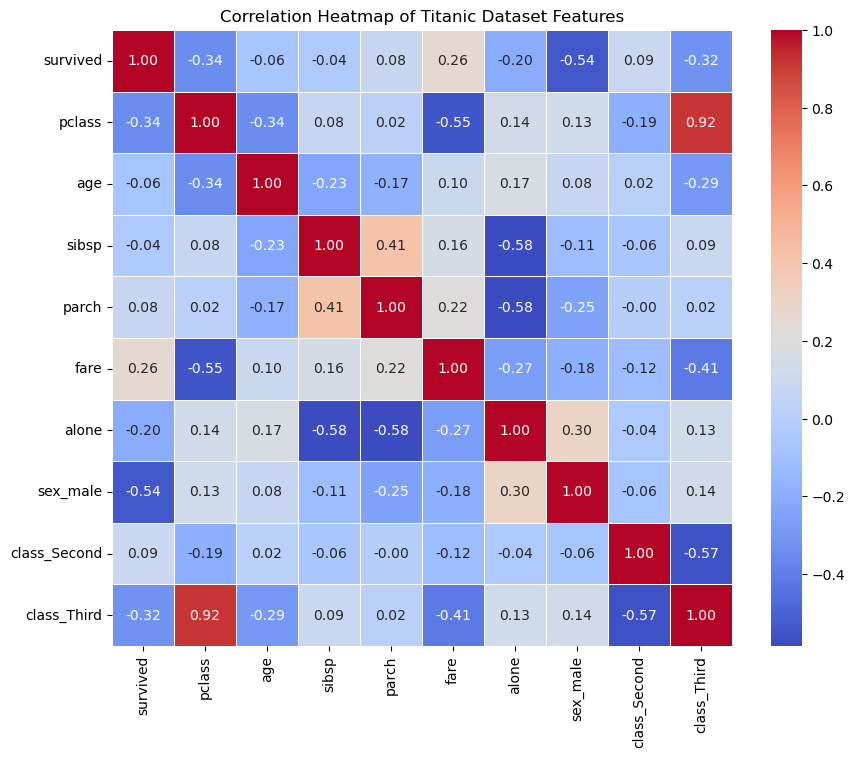

In [12]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()

In [13]:
X = df.drop(columns=['survived'])
y = df['survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test_scaled)

In [18]:
accuracy = accuracy_score(y_test, y_pred) # Calculates the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).
conf_matrix = confusion_matrix(y_test, y_pred) # Generates the confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives.
class_report = classification_report(y_test, y_pred) #Generates a detailed classification report that includes precision, recall, F1-score, and support for each class

In [19]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {conf_matrix}")
print(f"Class Report: {class_report}")

Accuracy: 0.8044692737430168
Confusion Matrix: [[91 14]
 [21 53]]
Class Report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

